In [66]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import os

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
not.fully.paid
0    0.839946
1    0.160054
Name: proportion, dt

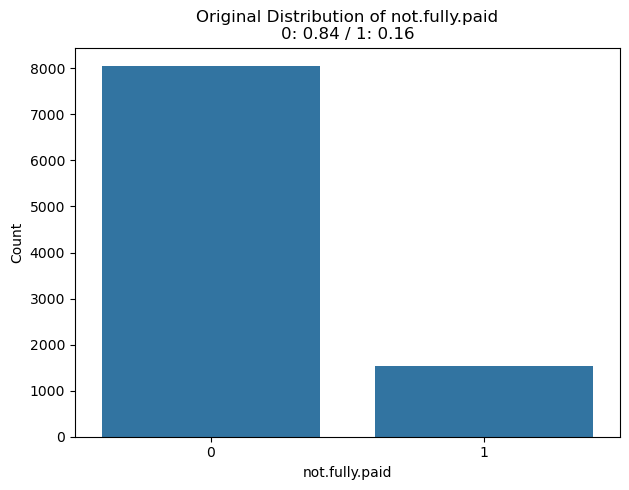

In [64]:

# Load the loan data
file_path = "loan_data.xls"
loan_data = pd.read_csv(file_path)

# Get information about the loan data
loan_data_info = loan_data.info()

# Calculate and print the target distribution
target_distribution = loan_data['not.fully.paid'].value_counts(normalize=True)
print(target_distribution)

# Split features and target variable
X = loan_data.drop('not.fully.paid', axis=1)
y = loan_data['not.fully.paid']

# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Plot the original distribution of the target variable
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
distribution_text = " / ".join([f"{index}: {value:.2f}" for index, value in target_distribution.items()])
plt.title(f'Original Distribution of not.fully.paid\n{distribution_text}')
plt.xlabel('not.fully.paid')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
not.fully.paid
0    0.839946
1    0.160054
Name: proportion, dt

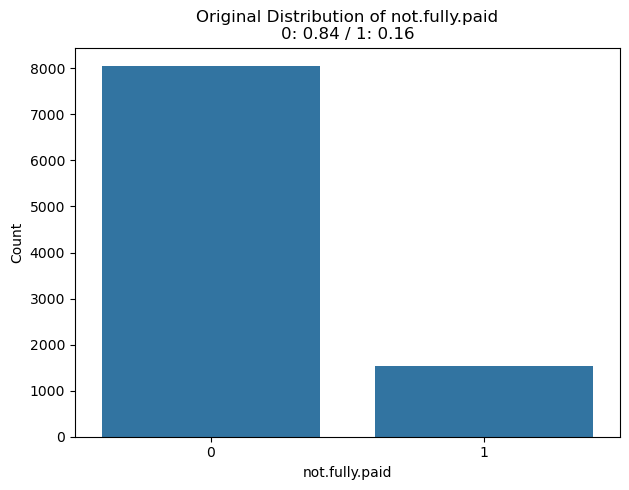

Distribution in batch_1.csv:
not.fully.paid
0    0.840017
1    0.159983
Name: proportion, dtype: float64
Distribution in batch_2.csv:
not.fully.paid
0    0.840017
1    0.159983
Name: proportion, dtype: float64
Distribution in batch_3.csv:
not.fully.paid
0    0.839666
1    0.160334
Name: proportion, dtype: float64
Distribution in batch_4.csv:
not.fully.paid
0    0.840084
1    0.159916
Name: proportion, dtype: float64


In [74]:
# Load the loan data
file_path = "loan_data.xls"
loan_data = pd.read_csv(file_path)

# Get information about the loan data
loan_data_info = loan_data.info()

# Calculate and print the target distribution
target_distribution = loan_data['not.fully.paid'].value_counts(normalize=True)
print(target_distribution)

# Split features and target variable
X = loan_data.drop('not.fully.paid', axis=1)
y = loan_data['not.fully.paid']

# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Plot the original distribution of the target variable
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
distribution_text = " / ".join([f"{index}: {value:.2f}" for index, value in target_distribution.items()])
plt.title(f'Original Distribution of not.fully.paid\n{distribution_text}')
plt.xlabel('not.fully.paid')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Combine features and target for splitting
loan_data_encoded = X_encoded.copy()
loan_data_encoded['not.fully.paid'] = y

# Split the data into 4 batches with similar distribution
batches = []
remaining_data = loan_data_encoded

for i in range(3):
    batch, remaining_data = train_test_split(remaining_data, test_size=(3 - i) / (4 - i), stratify=remaining_data['not.fully.paid'])
    batches.append(batch)

# Add the last remaining batch
batches.append(remaining_data)

# Save each batch to a CSV file
for i, batch in enumerate(batches):
    batch.to_csv(f'batches/batch_{i + 1}.csv', index=False)

# Verify the distribution of each batch
for i, batch in enumerate(batches):
    print(f'Distribution in batch_{i + 1}.csv:')
    print(batch['not.fully.paid'].value_counts(normalize=True))


In [68]:
# Folder containing the CSV files
folder_path = 'batches/'

# Iterate over each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Load the data
        df = pd.read_csv(file_path)
        
        # Assume the last column is the target variable
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1]
        
        # Apply SMOTE
        smote = SMOTE()
        X_resampled, y_resampled = smote.fit_resample(X, y)
        
        # Combine the resampled data into a DataFrame
        df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[df.columns[-1]])], axis=1)
        
        # Create the new file name with 'R' before the file extension
        resampled_file_name = file_name.replace('.csv', 'R.csv')
        resampled_file_path = os.path.join(folder_path, resampled_file_name)
        
        # Save the resampled data to a new CSV file
        df_resampled.to_csv(resampled_file_path, index=False)
        
        print(f"Resampled data saved to {resampled_file_path}")

Resampled data saved to batches/batch_1R.csv
Resampled data saved to batches/batch_2R.csv
Resampled data saved to batches/batch_3R.csv
Resampled data saved to batches/batch_4R.csv


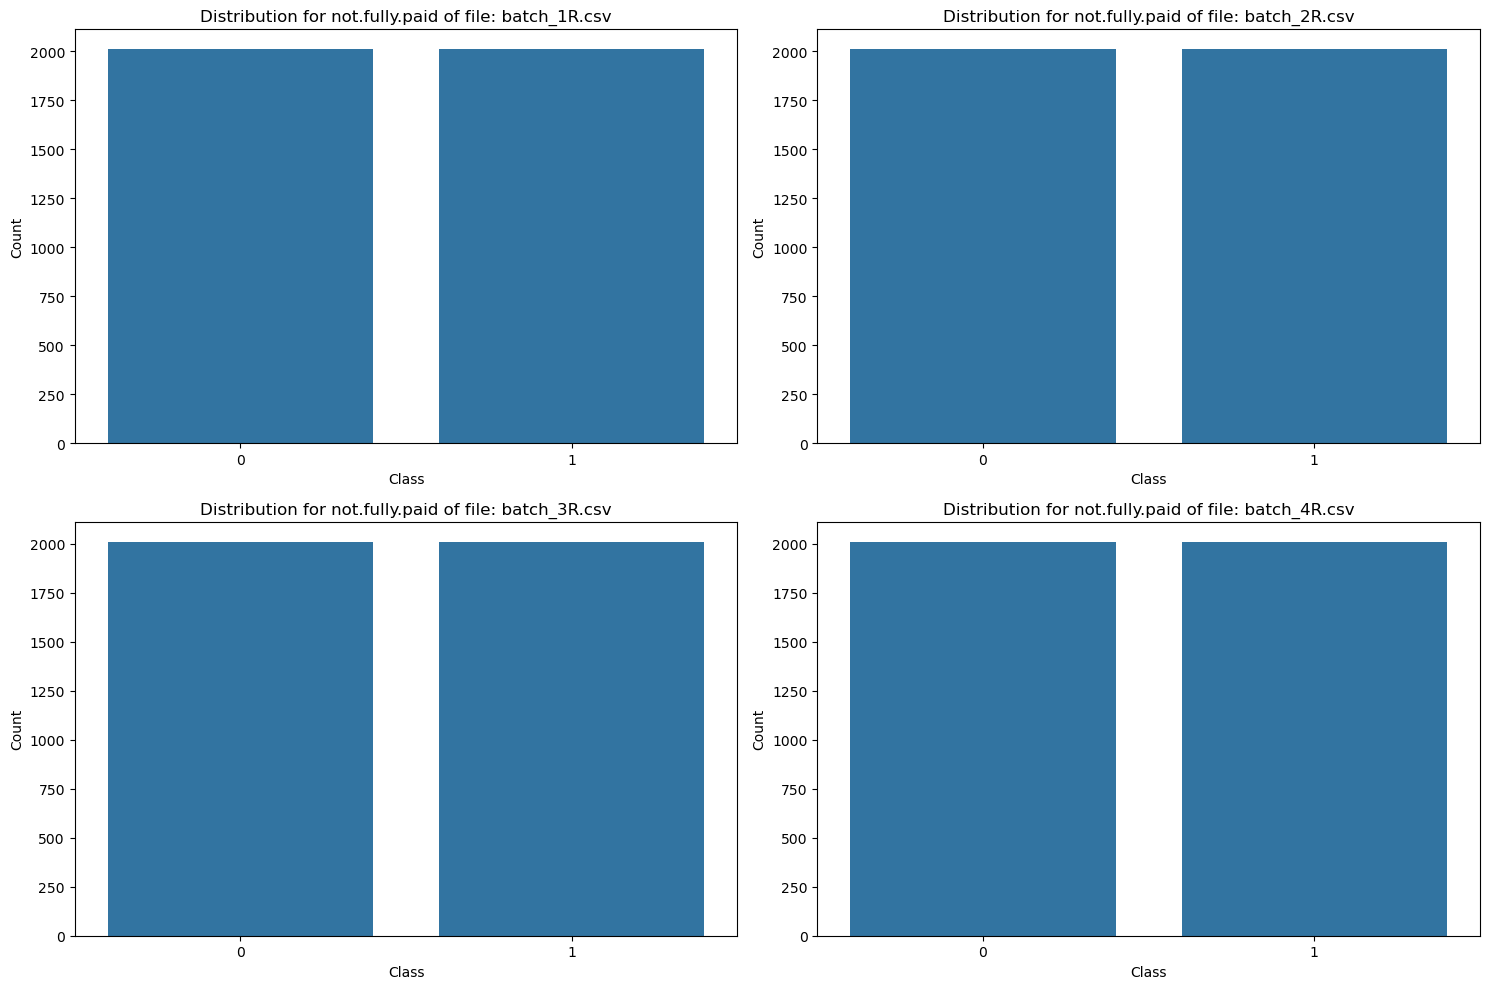

In [73]:
# Folder containing the CSV files
folder_path = 'batches/'

# Collect the resampled file names
resampled_files = [file for file in os.listdir(folder_path) if file.endswith('R.csv')]

# Set up the subplot grid
num_files = len(resampled_files)
num_cols = 2  # Number of columns for the subplot grid
num_rows = (num_files + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Iterate over each resampled CSV file
for idx, file_name in enumerate(resampled_files):
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)
    
    # Load the data
    df = pd.read_csv(file_path)
    
    # Assume the last column is the target variable
    target = df.iloc[:, -1]
    
    # Plot the distribution of the target variable
    sns.countplot(x=target, ax=axes[idx])
    axes[idx].set_title(f'Distribution for not.fully.paid of file: {file_name}')
    axes[idx].set_xlabel('Class')
    axes[idx].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

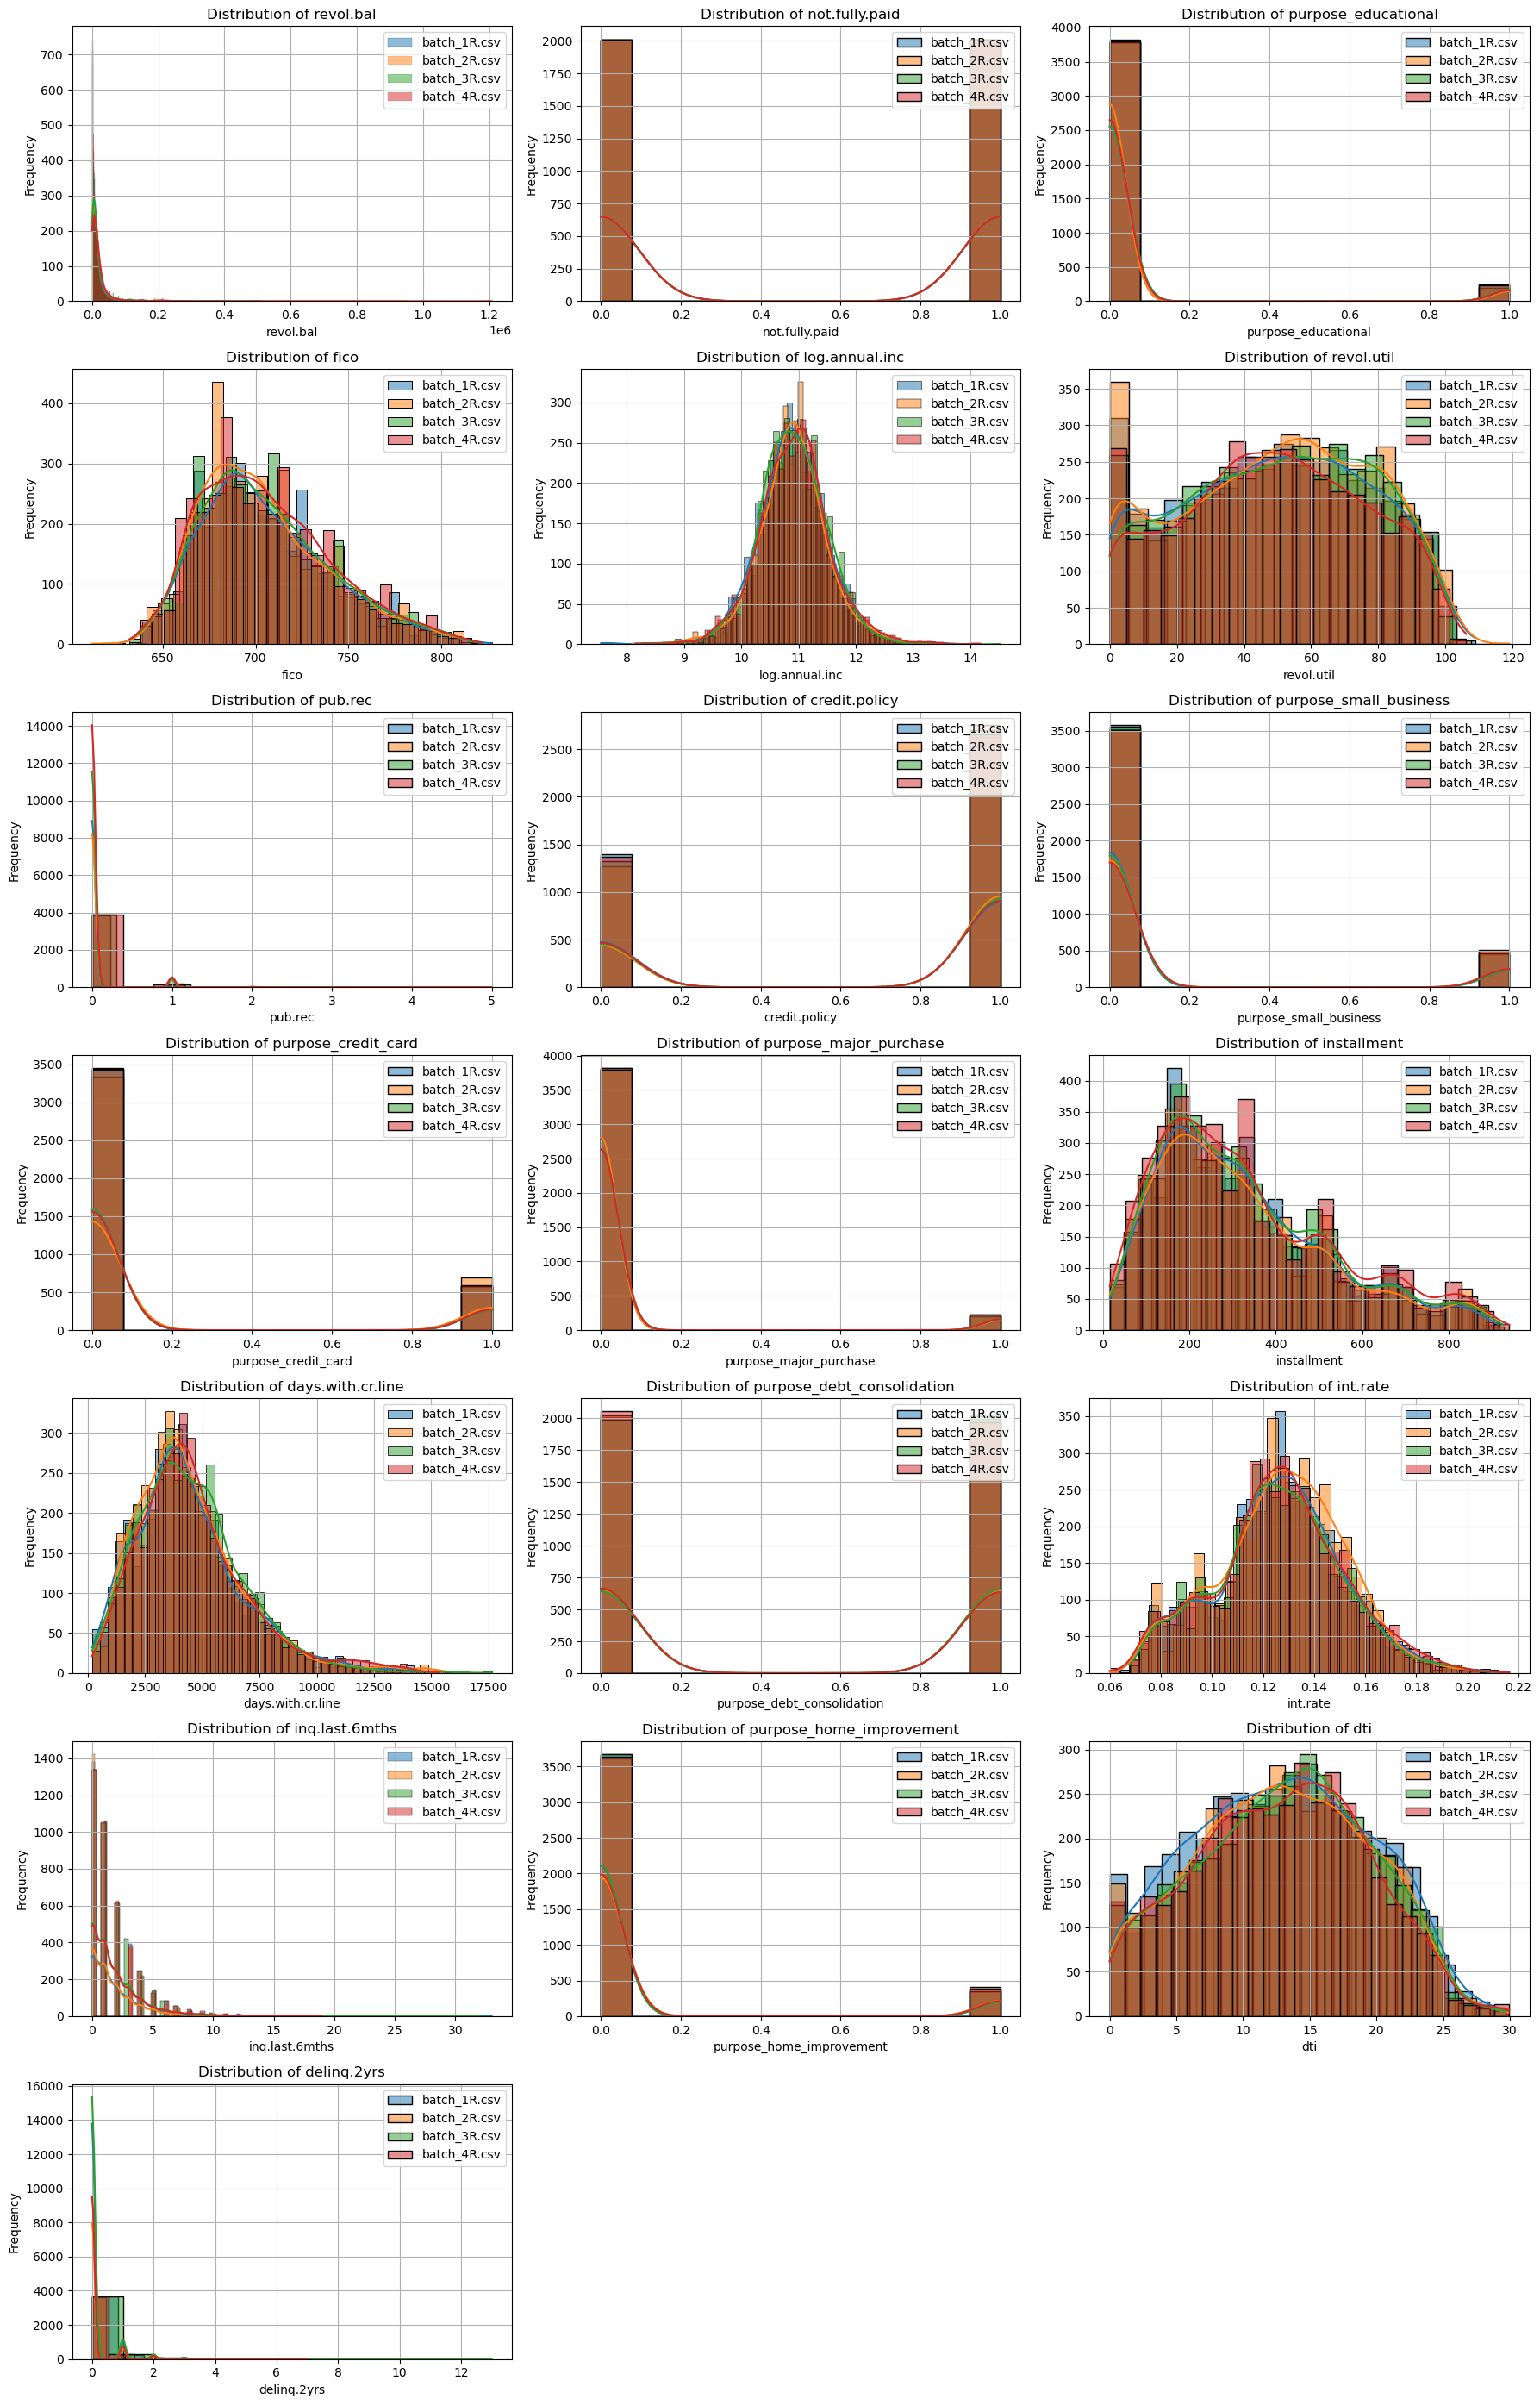

In [79]:
directory = 'batches/'  # Replace with your directory path

# Initialize a dictionary to store dataframes for each file
dataframes = {}

# List all files in the directory
for file_name in os.listdir(directory):
    # Check if the file name ends with 'R.csv'
    if file_name.endswith('R.csv'):
        # Construct full file path
        file_path = os.path.join(directory, file_name)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        dataframes[file_name] = df

# Get all unique columns from all dataframes
all_columns = set()
for df in dataframes.values():
    all_columns.update(df.columns)

# Create a subplot for each column
n_cols = 3
n_rows = (len(all_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, column in enumerate(all_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    for file_name, df in dataframes.items():
        if column in df.columns:
            sns.histplot(df[column], kde=True, label=file_name, alpha=0.5)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.grid(True)

plt.tight_layout()
plt.show()